### Data Mining and Machine Learning
### Principal Components Analysis (PCA)
### Edgar Acuna
#### October 2021

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Showing the effect of PCA using Bupa

In [2]:
#loading the data
url= "http://academic.uprm.edu/eacuna/bupa.dat"
names = ['mcv', 'alkphos', 'sgpt', 'aspar', 'gammagt', 'drinks', 'class']
data = pd.read_table(url, names=names,header=None)
y=data['class']
X=data.iloc[:,0:6]
X.corr()

,mcv,alkphos,sgpt,aspar,gammagt,drinks
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848
aspar,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224
drinks,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000


In [3]:
# Considering only features 3 and 4
X1=X.iloc[:,2:4]
X1.head()

,sgpt,aspar
0,45,27
1,59,32
2,33,16
3,34,24
4,12,28


<AxesSubplot:xlabel='sgpt', ylabel='aspar'>

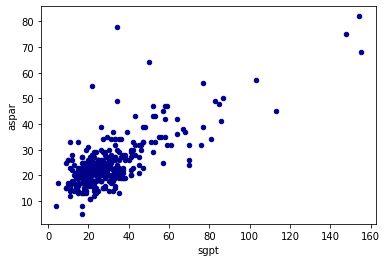

In [4]:
#scatterplot usando matplotlib
X1.plot.scatter('sgpt','aspar',c='DarkBlue')

In [5]:
#Coomputing the coefficients of PC1 and PC2 also called loadings
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(X1)
pca.components_

array([[ 0.92011644,  0.39164491],
       [-0.39164491,  0.92011644]])

In [6]:
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pcaDF.head()

,PC1,PC2
0,14.351286,-3.547471
1,29.191140,-4.429917
2,-0.998206,-8.969013
3,3.055070,-1.999726
4,-15.620912,10.296928


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

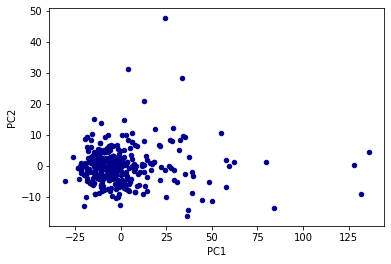

In [7]:
#scatterplot usando matplotlib
pcaDF.plot.scatter('PC1','PC2',c='DarkBlue')

In [8]:
pcaDF.corr().round(4)

,PC1,PC2
PC1,1.0,0.0
PC2,0.0,1.0


### Example 1. Applying PCA to Diabetes

In [9]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
y=data['class']
X=data.iloc[:,0:8]
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
### Reconstructing the data from the PCA's

In [11]:
mu = np.mean(X, axis=0)

pca = PCA()
pca.fit(X)
# using only two components
nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

pd.DataFrame(Xhat).head()

,0,1,2,3,4,5,6,7
0,4.812375,148.440473,72.988740,13.856122,1.204531,32.620470,0.460570,38.549945
1,3.356822,84.734084,63.677728,17.205315,0.744079,29.480767,0.404024,29.482460
2,5.533944,179.614168,77.540999,12.072978,-0.742789,34.136713,0.487253,43.025255
3,3.032244,88.049373,64.331318,23.228764,94.102916,30.508496,0.449321,28.309740
4,3.725826,132.343112,70.939536,25.830052,168.665075,33.378993,0.522327,33.306005


### Normalizing (standardizing ) los datos

In [12]:
X = StandardScaler().fit_transform(X)

### Using only 2 principal components

In [13]:
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print(pca.explained_variance_)

[2.09711056 1.73346726]


In [14]:
print(pca.explained_variance_ratio_)

[0.26179749 0.21640127]


In [15]:
print(pca.explained_variance_ratio_.cumsum())

[0.26179749 0.47819876]


Comentario: Las dos componentes principales solo acumulan el 47.81% de la variacion de los datos originales. La Varianza de cada componente aun es mayor que 1. Se necesitan usar mas componentes

In [16]:
#Applying LDA to the 2 components and the percentage of precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ypred=ldadis.predict(principalComponents)
precision=(y==ypred).sum()/float(768)
print("Este la precision con 2 PC=", precision)

Este la precision con 2 PC= 0.7174479166666666


In [17]:
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pcaDF.head()

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


In [18]:
#hallando la correlacion de las dos primeras compoenentes principales
pcaDF.corr().round(4)

,PC1,PC2
PC1,1.0,0.0
PC2,0.0,1.0


Notar que la correlacion entre PC1 y PC2 es 0

In [19]:
#Joining the 2 PC with the class
finalDf = pd.concat([pcaDF, data[['class']]], axis = 1)
finalDf.head(5)

,PC1,PC2,class
0,1.068503,1.234895,2
1,-1.121683,-0.733852,1
2,-0.396477,1.595876,2
3,-1.115781,-1.271241,1
4,2.359334,-2.184819,2


### Visualizing the data using two PC 

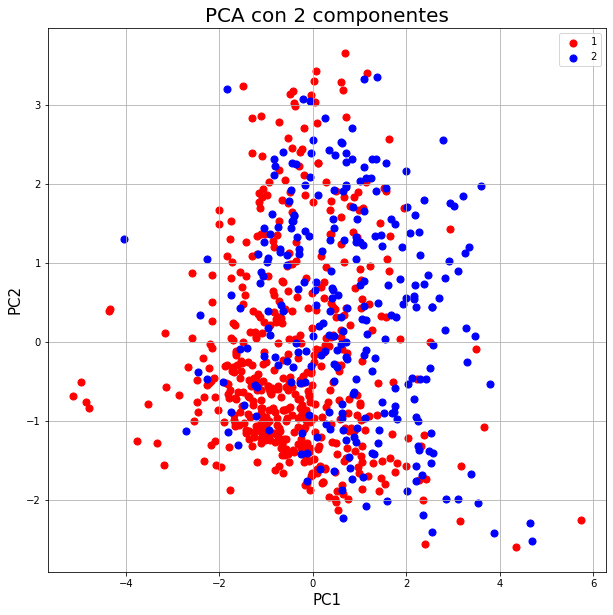

In [20]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA con 2 componentes', fontsize = 20)


targets = [1, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Using  three PCA's for Diabetes

In [21]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[2.09711056 1.73346726 1.03097228]
[0.26179749 0.21640127 0.12870373]
[0.26179749 0.47819876 0.60690249]


Comentario: las tres primeras componentes principales acumulan solo el 60.90% de la variacion Total. Todas las varianzas tienen varianza mayor que 1.  Aun se  necesitan mas componentes

In [22]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ypred=ldadis.predict(principalComponents)
precision=(y==ypred).sum()/float(768)
print("Este la precision con tres PC=", precision)

Este la precision con tres PC= 0.73046875


Text(0.5, 0.92, 'PCA con 3 componentes para Diabetes')

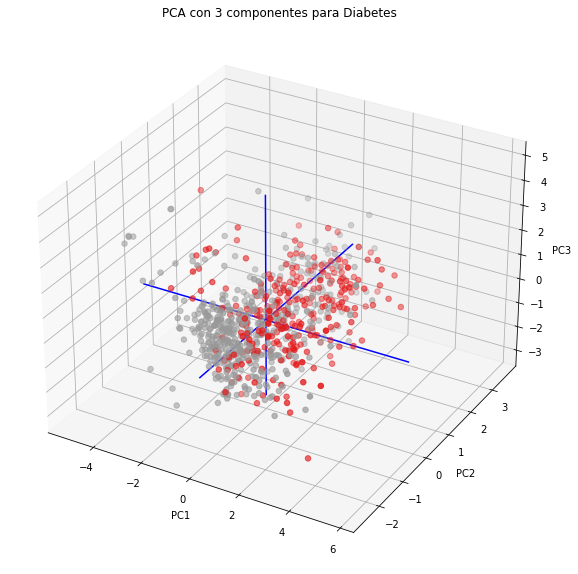

In [23]:
#Haciendo la grafica 3D
# Store results of PCA in a data frame
result=pd.DataFrame(principalComponents, columns=['PCA%i' % i for i in range(3)], index=data.index)
# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y,  cmap="Set1_r", s=30)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'b')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'b')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA con 3 componentes para Diabetes")
#plt.show()


In [24]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(principalComponents,y)
#Tasa de precision
ldadis.score(principalComponents, y)

0.73046875

### Screeplot to decide the optimal number of  components

Text(0.5, 1.0, 'Screeplot para Diabetes')

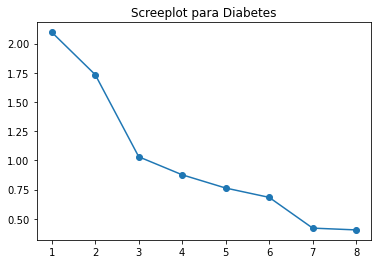

In [25]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X)
y=pca.explained_variance_
x=range(1,9)
plt.scatter(x,y)
plt.plot(x,y)
plt.title("Screeplot para Diabetes")

### Three PCs seems to be the optimal number

### Example 2: Applying  PCA to Landsat

In [26]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
X = StandardScaler().fit_transform(X)
#y1=y.as_matrix()
#X1=X.as_matrix()

In [27]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[16.48810712 14.08354844]
[0.45789971 0.39112147]
[0.45789971 0.84902117]


Con dos componentes se tiene un 84.90% porciento de la variacion de la matriz original X

In [28]:
pcaDF['class']=y
finalDf=pcaDF
finalDf.tail(5)

,PC1,PC2,class
4430,0.612799,2.700792,5
4431,1.241313,1.681827,5
4432,1.354049,0.482016,4
4433,1.501719,-0.140714,4
4434,1.505878,-0.378510,4


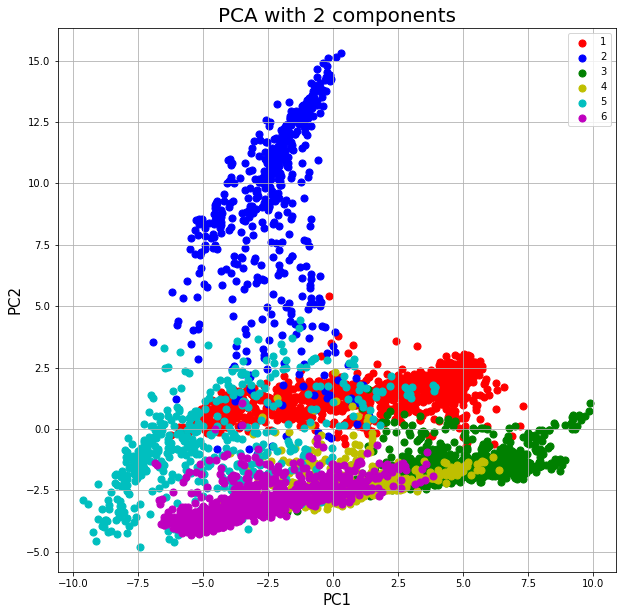

In [29]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA with 2 components', fontsize = 20)


targets = [1, 2, 3,4,5,6]
colors = ['r', 'b','g','y','c','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Using three PCs

In [30]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[16.48810712 14.08354844  1.60839775]
[0.45789971 0.39112147 0.04466764]
[0.45789971 0.84902117 0.89368882]


#### Con dos componentes se tiene un 89.36% porciento de la variacion de la matriz original X

Text(0.5, 0.92, 'PCA with 3 components for Landsat')

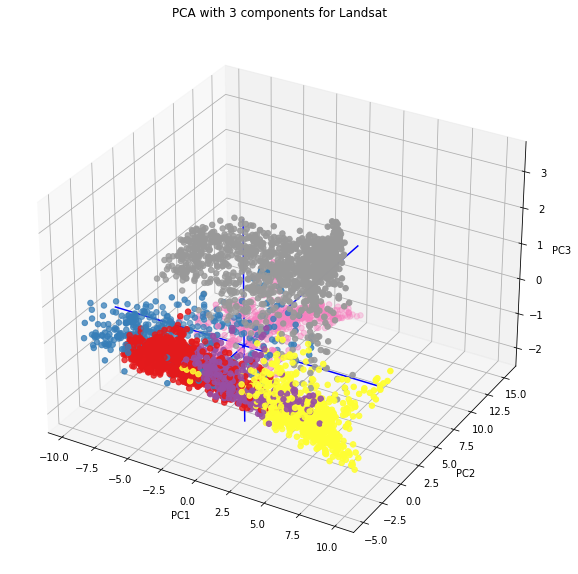

In [31]:
#Haciendo la grafica 3D
# Store results of PCA in a data frame
result=pd.DataFrame(principalComponents, columns=['PCA%i' % i for i in range(3)], index=data.index)
# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y,  cmap="Set1_r", s=30)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'b')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'b')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA with 3 components for Landsat")
#plt.show()
